# Imports

In [31]:
from scipy.stats import norm
from sklearn.svm import NuSVR
import matplotlib.mlab as mlab
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import uproot
import pickle
import pandas as pd
import numpy as np
import h5py
%matplotlib inline

In [2]:
noRegFile = uproot.open("pfClusters_tree_noPU_testing.root")
withRegFile = uproot.open("pfClusters_tree_noPU_withRegression.root")

eventsNoReg = noRegFile["een_analyzer/PfTree"]
eventsWithReg = withRegFile["een_analyzer/PfTree"]

In [3]:
the = eventsWithReg.arrays( library = "pd")
the['genEta'].iloc[0]

0.24263829

In [4]:
'''eventsWithReg_EB = 

for i in range(len(eventsWithReg)):
    
    #a = str(i)
    #thing = "binned_genPt_" + a
    if the['clusLayer'].iloc[i] == -1:
        eventsWithReg_EB.append(the.iloc[i])'''

'eventsWithReg_EB = \n\nfor i in range(len(eventsWithReg)):\n    \n    #a = str(i)\n    #thing = "binned_genPt_" + a\n    if the[\'clusLayer\'].iloc[i] == -1:\n        eventsWithReg_EB.append(the.iloc[i])'

In [5]:
the

,nClus,clusrawE,cluscorrE,clusPt,clusEta,clusRho,clusPhi,clusLayer,clusSize,clusIetaIx,...,iphimod20,nhits,tgtvar,nlgtgtvar,weight,nhits_mod,response,resolution,e91X,e91Xres
0,1,4.526902,5.480571,4.390703,0.248438,136.782043,-2.979031,-1.0,0,14,...,19,0,0.142071,1.152659,8.928619e-07,0,1.208565,0.065777,5.471057,0.359867
1,1,11.942281,13.527057,4.896970,-1.539651,145.982254,-1.070888,-2.0,0,74,...,7,0,0.032519,1.033053,8.928619e-07,0,1.127391,0.212046,13.463615,2.854910
2,2,10.810892,12.592491,4.429137,1.540616,145.817352,2.069912,-2.0,0,27,...,12,0,0.132050,1.141165,8.928619e-07,0,1.147799,0.209729,12.408736,2.602467
3,1,3.180022,3.893151,1.681455,1.251751,134.440491,-2.868172,-1.0,0,72,...,5,0,0.196636,1.217301,8.928619e-07,0,1.219863,0.078945,3.879190,0.306243
4,2,3.241756,3.998387,1.739715,-1.234222,134.573212,0.276981,-1.0,0,-71,...,5,0,0.177409,1.194119,8.928619e-07,0,1.220914,0.079122,3.957904,0.313157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738591,1,10848.267578,11973.866211,1289.575562,-2.819288,39.452011,2.153526,-2.0,14,43,...,0,14,0.064293,1.066405,1.925373e-05,3,1.084616,0.161809,11766.208008,1903.883911
2738592,2,11006.529297,12062.009766,1319.441650,2.810815,39.786869,-0.984472,-2.0,10,58,...,19,10,0.049810,1.051071,1.925373e-05,3,1.069312,0.140551,11769.417969,1654.203979
2738593,1,11173.457031,12207.726562,1416.177979,2.754686,42.099720,0.840896,-2.0,13,60,...,0,13,0.041229,1.042090,1.925373e-05,3,1.064540,0.152786,11894.591797,1817.324585
2738594,2,11395.207031,12449.768555,1431.057861,-2.763960,41.716240,-2.296368,-2.0,14,41,...,19,14,0.021577,1.021811,1.925373e-05,3,1.043631,0.105224,11892.396484,1251.360107


# Definitions:

In [6]:
def Ptrange(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 2
    if n == 2:
        lowPt = 2
        highPt = 3
    if n == 3:
        lowPt = 3
        highPt = 4
    if n == 4:
        lowPt = 4
        highPt = 5
    if n == 5:
        lowPt = 5
        highPt = 6
    if n == 6:
        lowPt = 6
        highPt = 7
    if n == 7:
        lowPt = 7
        highPt = 8
    if n == 8:
        lowPt = 8
        highPt = 9
    if n == 9:
        lowPt = 9
        highPt = 10
    
    return lowPt, highPt    

# Variables:

In [7]:

regVarsEB = eventsWithReg.arrays(["clusrawE", "clusIetaIx", "clusIphiIy", "ietamod20", "iphimod20", "nhits_mod"], library = "pd")
tgtvar = eventsWithReg.arrays("genEnergy", library = "pd")

regVarsEB = regVarsEB[:10000]
tgtvar = tgtvar[:10000]
print(tgtvar)

      genEnergy
0      5.217974
1     12.337011
2     12.337011
3      3.871043
4      3.871043
...         ...
9995  21.396683
9996  80.141945
9997   9.519979
9998   9.519979
9999   2.930506

[10000 rows x 1 columns]


# Training and Fitting:

In [24]:
#split data
xtrain, xtest, ytrain, ytest = train_test_split(regVarsEB, tgtvar, test_size=0.15)
ytrain = np.ravel(ytrain)
#xgbr
xgbr = XGBRegressor(verbosity = 0)
xgbr.fit(xtrain, ytrain)
ypred_xgbr = xgbr.predict(regVarsEB, ntree_limit=xgbr.best_ntree_limit)


score = xgbr.score(xtrain, np.ravel(ytrain))
print("training score: ", score)
print(ypred_xgbr)
print(tgtvar)

#nusvr
nsvr = NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)
nsvr.fit(xtrain, ytrain)
ypred_nsvr = nsvr.predict(regVarsEB)


C:\Users\jonla\anaconda4\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


training score:  0.9987934530996583
[ 5.4372883 13.195948  12.391648  ...  9.962018   9.901378   2.9387364]
      genEnergy
0      5.217974
1     12.337011
2     12.337011
3      3.871043
4      3.871043
...         ...
9995  21.396683
9996  80.141945
9997   9.519979
9998   9.519979
9999   2.930506

[10000 rows x 1 columns]


# save models:

In [35]:
pickle.dump(nsvr, open('nsvr_model.sav', 'wb'))
pickle.dump(xgbr, open('xgbr_model.sav', 'wb'))

In [9]:
len(xtrain)

8500

# Creating Dataframe:

In [10]:
genPt = (eventsWithReg["genPt"].array())[:10000]
genEta = (eventsWithReg["genEta"].array())[:10000]
response = (eventsWithReg["response"].array())[:10000]
tgtvar_og = (eventsWithReg["tgtvar"].array())[:10000]
clusrawE = (eventsWithReg["clusrawE"].array())[:10000]
cluscorrE = (eventsWithReg["cluscorrE"].array())[:10000]
clusPt = (eventsWithReg["clusPt"].array())[:10000]
genEnergy = (eventsWithReg["genEnergy"].array())[:10000]
e91X = (eventsWithReg["e91X"].array())[:10000]
events = np.arange(0,10000,1)

'''genEta = pd.DataFrame((eventsWithReg.array("genEta" library = "pd"))[:1000])
genEnergy = pd.DataFrame((eventsWithReg.array("genEnergy", library = "pd"))[:1000])
response = pd.DataFrame((eventsWithReg.array("response", library = "pd"))[:1000])
tgtvar = pd.DataFrame((eventsWithReg.array("tgtvar", library = "pd"))[:1000])
clusrawE = pd.DataFrame((eventsWithReg.array("clusrawE", library = "pd"))[:1000])
cluscorrE = pd.DataFrame((eventsWithReg.array("cluscorrE", library = "pd"))[:1000])
events = pd.DataFrame(np.arange(1000))'''

rawDivGen = np.divide(clusrawE, genEnergy)
e91XDivGen = np.divide(e91X, genEnergy)
xgbrDivGen = np.divide(ypred_xgbr, genEnergy)
nsvrDivGen = np.divide(ypred_nsvr, genEnergy)
corrDivGen = np.divide(cluscorrE, genEnergy)


In [11]:
df = pd.DataFrame({
    'events':events,
    'genPt':genPt,
    'genEta':genEta,
    'clusPt':clusPt,
    'clusrawE':clusrawE,
    'cluscorrE':cluscorrE,
    'xgbr_Energy':ypred_xgbr,
    'e91X' :e91X,
    'genEnergy':genEnergy,
    'rawDivGen':rawDivGen,
    'e91XDivGen':e91XDivGen,
    'xgbrDivGen':xgbrDivGen,
    'nsvrDivGen':nsvrDivGen,
    'corrDivGen':corrDivGen
})
df

,events,genPt,genEta,clusPt,clusrawE,cluscorrE,xgbr_Energy,e91X,genEnergy,rawDivGen,e91XDivGen,xgbrDivGen,nsvrDivGen,corrDivGen
0,0,5.068054,0.242638,4.390703,4.526902,5.480571,5.519683,5.471057,5.217974,0.867559,1.048502,1.057821,0.993307,1.050326
1,1,5.028025,-1.546343,4.896970,11.942281,13.527057,13.165195,13.463615,12.337011,0.968004,1.091319,1.067130,1.099736,1.096461
2,2,5.028025,1.546343,4.429137,10.810892,12.592491,12.278076,12.408736,12.337011,0.876297,1.005814,0.995223,1.021902,1.020708
3,3,2.062530,1.242739,1.681455,3.180022,3.893151,3.975731,3.879190,3.871043,0.821490,1.002105,1.027044,1.355227,1.005711
4,4,2.062530,-1.242739,1.739715,3.241756,3.998387,4.054124,3.957904,3.871043,0.837437,1.022439,1.047295,1.354017,1.032896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9.985923,1.395676,8.925881,19.756176,21.401848,21.427210,21.376278,21.396683,0.923329,0.999046,1.001427,0.917078,1.000241
9996,9996,9.362505,-2.836804,6.495093,55.668633,66.742966,78.564575,68.298859,80.141945,0.694625,0.852224,0.980318,0.748107,0.832809
9997,9997,8.407238,-0.508988,7.698627,8.791713,10.025318,10.067803,9.862888,9.519979,0.923501,1.036020,1.057545,0.983207,1.053082
9998,9998,8.407238,0.508988,7.757132,8.719292,9.965464,9.829953,9.801323,9.519979,0.915894,1.029553,1.032560,0.857241,1.046795


In [12]:
df['binned_corrDivGen'] = pd.cut(df['corrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_e91XDivGen'] = pd.cut(df['e91XDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_nsvrDivGen'] = pd.cut(df['nsvrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_xgbrDivGen'] = pd.cut(df['xgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_genPt'] = pd.cut(df['genPt'], bins = np.arange(0,11), labels = ['0','1','2','3','4','5','6','7','8','9'])

In [13]:
list_of_genPt_dicts = []

list_of_strings = []
for i in range(1, 11):
    thing = "str" + str(i)
    list_of_strings.append(thing)

for i in range(0,10):
    
    #a = str(i)
    #thing = "binned_genPt_" + a

    list_of_genPt_dicts.append(df[df['binned_genPt'] == str(i)])

#list_of_genPt_dicts[4]
div_bins = np.arange(.6,1.6,0.05)
div_bins

array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55])

# bin corr/gen values


# Histograms:

[14      3.247004
15      1.568476
22      1.231556
136     1.769406
137     4.064805
          ...   
9874    2.896619
9875    2.817986
9911    1.799599
9948    1.199224
9985    5.342215
Name: nsvrDivGen, Length: 334, dtype: float64, 14      0.986150
15      0.793476
22      1.049472
136     1.301659
137     0.945107
          ...   
9874    0.968728
9875    0.894660
9911    0.996243
9948    0.956261
9985    1.052211
Name: xgbrDivGen, Length: 334, dtype: float32, 14      0.920547
15      0.876980
22      1.041237
136     1.307893
137     0.991325
          ...   
9874    1.071658
9875    0.876647
9911    0.924806
9948    0.883355
9985    0.893236
Name: e91XDivGen, Length: 334, dtype: float32, 14      0.923217
15      0.879523
22      1.060517
136     1.272439
137     0.964452
          ...   
9874    1.056259
9875    0.883205
9911    0.954501
9948    0.892354
9985    0.940104
Name: corrDivGen, Length: 334, dtype: float32]
[35      1.858525
44      1.378911
45      1.475136
53      1.2

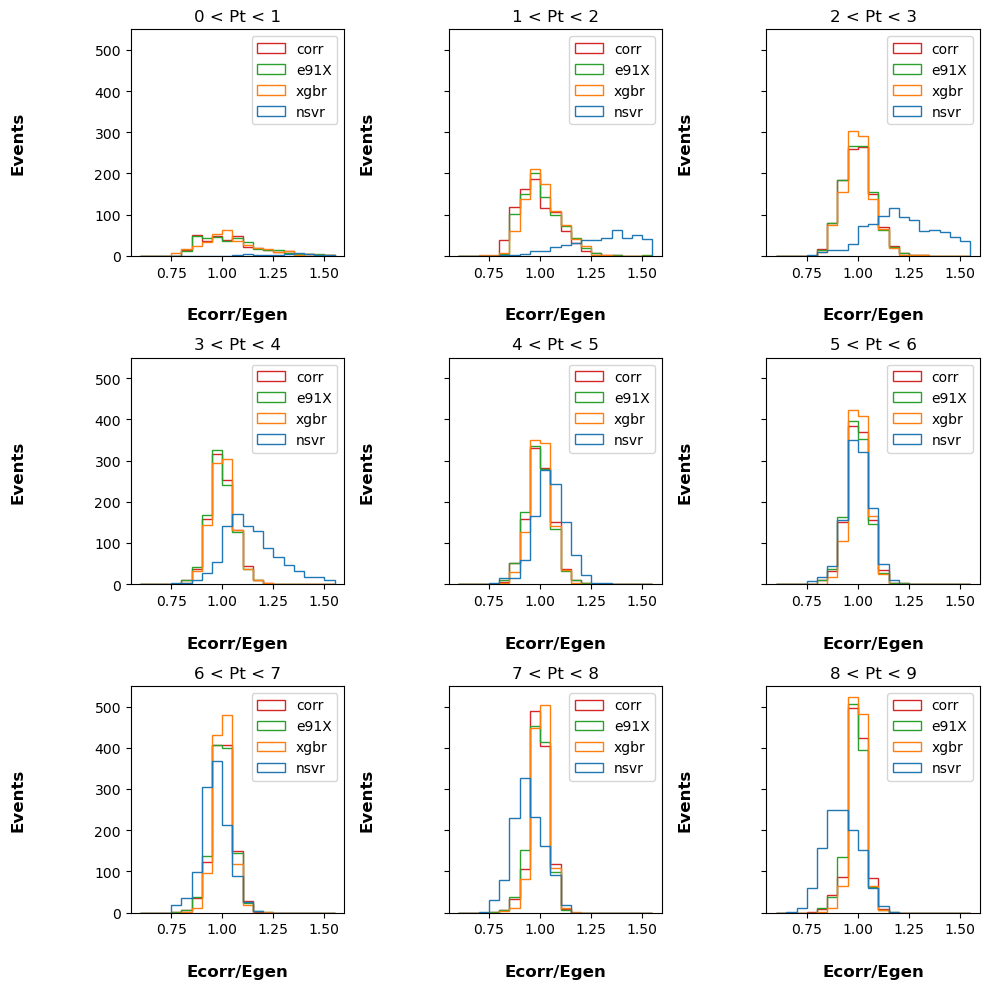

In [14]:

list_of_lists = []
# Creating histogram

fig, ax = plt.subplots(3,3, figsize =(10, 10),sharey=True,tight_layout=True )

#axs[1,1].hist(list_of_genPt_dicts[4]['xgbrDivGen'], histtype='bar', bins = np.arange(.6,1.6,0.05), rwidth=0.85, color = 'red')
scatter = []

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([list_of_genPt_dicts[i]['nsvrDivGen'], list_of_genPt_dicts[i]['xgbrDivGen'], list_of_genPt_dicts[i]['e91XDivGen'], list_of_genPt_dicts[i]['corrDivGen']])
    
    
    
    labels = ["nsvr", "xgbr", "e91X", "corr"]
    print(list_of_lists[i])
    ax[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    #ax[b,a].hist(list_of_genPt_dicts[i]['xgbrDivGen'], label = 'xgbr', histtype='step', bins = np.arange(.6,1.6,0.05), rwidth=0.85, color = 'blue')
    #ax[b,a].hist(list_of_genPt_dicts[i]['e91XDivGen'], label = 'e91X', histtype='step', bins = np.arange(.6,1.6,0.05), rwidth=0.85, color = 'green')
    #ax[b,a].hist(list_of_genPt_dicts[i]['corrDivGen'], label = 'corr', histtype='step', bins = np.arange(.6,1.6,0.05), rwidth=0.85, color = 'orange')
    
    ax[b,a].legend(prop={'size':10})
    
    ax[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax[b,a].set_title((str(Ptrange(i)[0]) + " < Pt < " + str(Ptrange(i)[1])))
    
    #df_l = pd.DataFrame(list_of_lists)
    
  
    
    #scatter[i] = ax[b,a].hist(list_of_lists)
    #print(scatter[i])
    
    

 
    # Show plot
plt.savefig("reg_comp_hist.pdf")

# Fitting process:

In [15]:
df_lol = pd.DataFrame(list_of_lists)

array([  0.,   0.,   0.,   2.,   2.,   9.,  26.,  55., 142., 171., 142.,
       129.,  87.,  67.,  46.,  33.,  17.,  18.,  10.])

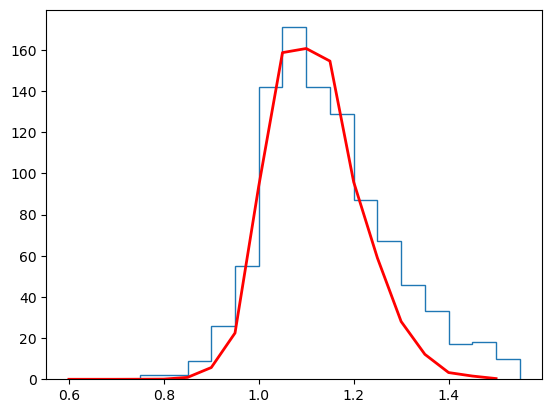

In [16]:
mun, sigma = norm.fit(df_lol.iloc[3,0])
count, bins, ignored = plt.hist(df_lol.iloc[3,0], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))

bins = bins[:-1]

plt.plot(bins, count*.4* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')
count 

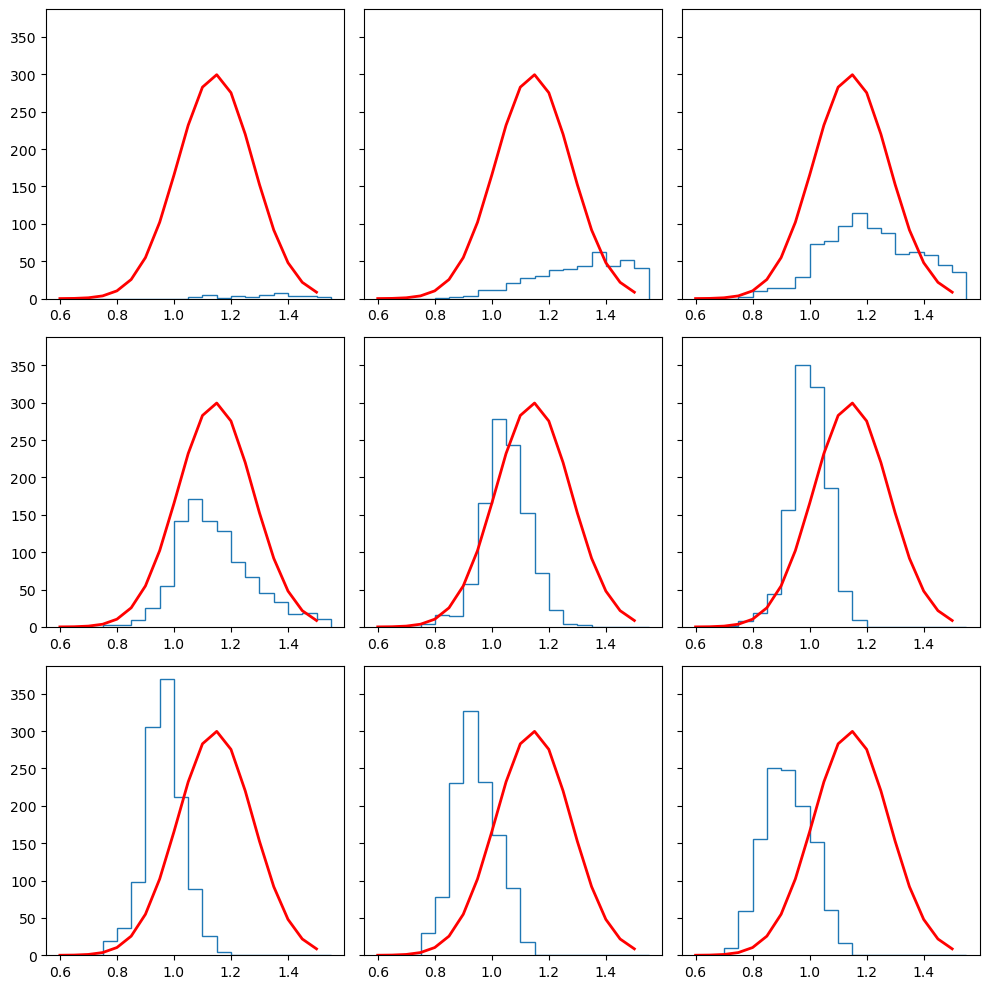

In [17]:
fig2, ax2 = plt.subplots(3,3, figsize =(10, 10),sharey=True,tight_layout=True )

x = []
for i in range(9):
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    mun, sigma = norm.fit(df_lol.iloc[3,0])
    count, bins, ignored = ax2[b,a].hist(df_lol.iloc[i,0], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
   
    
    x.append([count,bins])
    
    bins = bins[:-1]

    ax2[b,a].plot(bins,100* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')





ValueError: not enough values to unpack (expected 3, got 2)

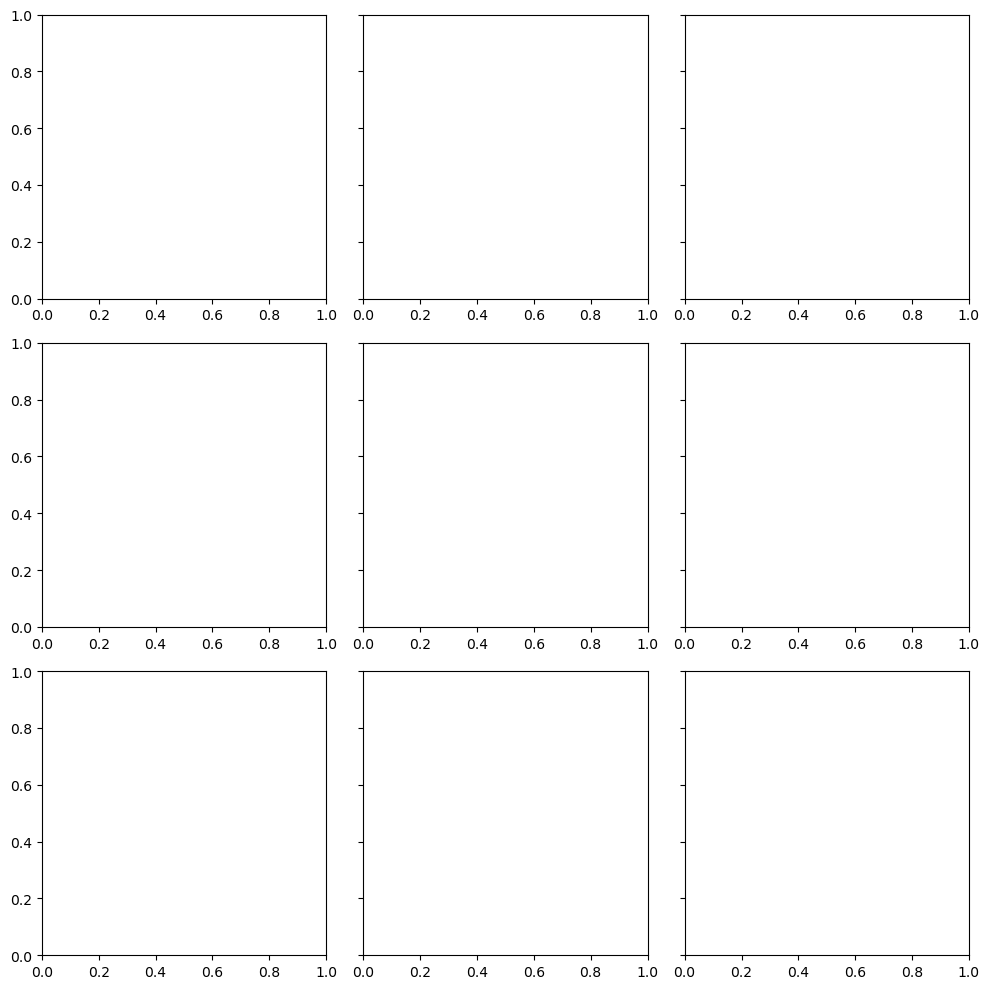

In [18]:
fig3, ax3 = plt.subplots(3,3, figsize =(10, 10),sharey=True,tight_layout=True )

for i in range(9):
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    y1,x1, trash = x[i]
    x1 = x1[:-1]
    
    
    ax3[b,a].plot(x1,y1)
    
    